# Projekt MSP1

__Autor:__

David Chocholatý, xchoch09

## Úloha 1 - Bayesovské odhady

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

- počet připojení za 1 ms popsaný 𝑋~𝑃𝑜(𝜆)
- expertní odhad: každých 5 ms by mělo nastat 10 připojení
- máme pozorování za dobu 100 ms


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
df_1 = pd.read_excel(open('Projekt-2_Data.xlsx', 'rb'), sheet_name='Úloha 1')
df_1

,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


In [3]:
OBSERVATIONS_COUNT = 100

observations = df_1['uloha_1 a)'][:OBSERVATIONS_COUNT]
observations = observations.astype('int64')
observations

0     2
1     2
2     1
3     3
4     0
     ..
95    3
96    0
97    3
98    1
99    1
Name: uloha_1 a), Length: 100, dtype: int64

#### Konjugované apriorní a aposteriorní rozdělení (expertní informace)

apriorní:
-----------
alfa: 10
beta: 5
aposteriorní:
-----------
alfa: 176
beta: 105


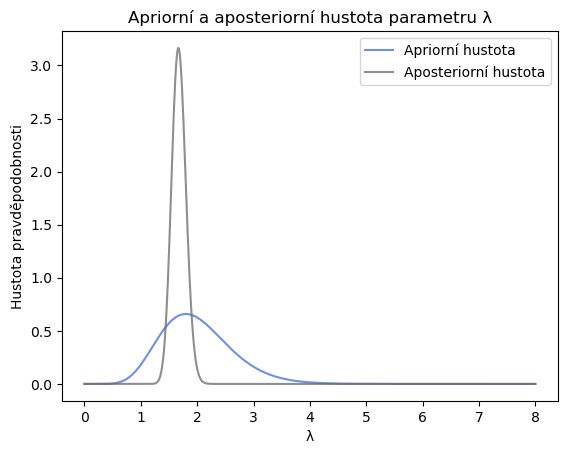

In [4]:
alpha_prior = 10
beta_prior = 5

alpha_posterior = alpha_prior + sum(observations)
beta_posterior = beta_prior + len(observations)

print('apriorní:')
print('-----------')
print('alfa: ' + str(alpha_prior))
print('beta: ' + str(beta_prior))
print('aposteriorní:')
print('-----------')
print('alfa: ' + str(alpha_posterior))
print('beta: ' + str(beta_posterior))

x = np.linspace(0, 8, 1000)

pdf_prior = stats.gamma.pdf(x, alpha_prior, scale=1/beta_prior)
pdf_posterior = stats.gamma.pdf(x, alpha_posterior, scale=1/beta_posterior)

fig, ax = plt.subplots(1, 1)
plt.title('Apriorní a aposteriorní hustota parametru λ')
ax.plot(x, pdf_prior, color='royalblue', label='Apriorní hustota', alpha=0.75)
ax.plot(x, pdf_posterior, color='dimgray', label='Aposteriorní hustota', alpha=0.75)
ax.legend(loc='best')
plt.xlabel('λ')
plt.ylabel('Hustota pravděpodobnosti')
plt.show()

#### Prediktivní rozdělení (pozorování)

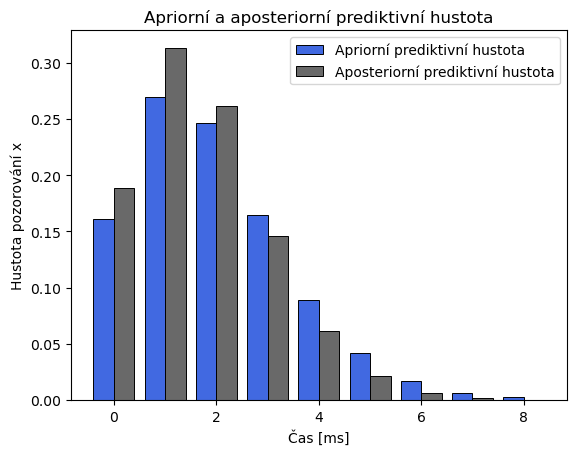

In [5]:
x = np.arange(0, 9)

pmf_prior = stats.nbinom.pmf(x, alpha_prior, beta_prior/(1 + beta_prior))
pmf_posterior = stats.nbinom.pmf(x, alpha_posterior, beta_posterior/(1 + beta_posterior))

fig, ax = plt.subplots(1, 1)
plt.title('Apriorní a aposteriorní prediktivní hustota')
# plt.plot(x, pmf_prior, 'o', color='royalblue', label='Apriorní prediktivní hustota')
plt.bar(x - 0.2, pmf_prior, width=0.4, color='royalblue', edgecolor = 'black', linewidth=0.7, label='Apriorní prediktivní hustota')
# plt.plot(x, pmf_posterior, 'o', color='dimgray', label='Aposteriorní prediktivní hustota')
plt.bar(x + 0.2, pmf_posterior, width=0.4, color='dimgray', edgecolor = 'black', linewidth=0.7, label='Aposteriorní prediktivní hustota')
ax.legend(loc='best')
plt.xlabel('Čas [ms]')
plt.ylabel('Hustota pozorování x')
plt.show()

#### 95% interval spolehlivosti

In [6]:
low_prior = stats.gamma.ppf(0.025, alpha_prior, scale=1/beta_prior)
high_prior = stats.gamma.ppf(0.975, alpha_prior, scale=1/beta_prior)

low_posterior = stats.gamma.ppf(0.025, alpha_posterior, scale=1/beta_posterior)
high_posterior = stats.gamma.ppf(0.975, alpha_posterior, scale=1/beta_posterior)

print("Apriorní:")
print(low_prior, high_prior)
print("Aposteriorní:")
print(low_posterior, high_posterior)
# TODO posterior

Apriorní:
0.9590777392264868 3.416960690283833
Aposteriorní:
1.4376938284869922 1.9327207471868797


In [7]:
mean = alpha_posterior / beta_posterior
median = stats.gamma.ppf(0.5, a=alpha_posterior, scale=1/beta_posterior)

print(mean, median)

1.6761904761904762 1.6730169441241727


In [8]:
mean_2_prior = stats.poisson.mean(alpha_prior / beta_prior)
mean_2_pos = stats.poisson.mean(alpha_posterior / beta_posterior)

print("Apriorní:")
print(mean_2_prior)

print("Aposteriorní:")
print(mean_2_pos)

Apriorní:
2.0
Aposteriorní:
1.6761904761904762


#### Aproximace diskrétním rozdělením

In [9]:
# Apriorní informace
MEASUREMENTS_COUNT = 100000
measured_vals_prior = df_1[['skupina', 'uloha_1 b)_prior']][:MEASUREMENTS_COUNT]
measured_vals_prior

,skupina,uloha_1 b)_prior
0,0,3.634785
1,0,2.868113
2,0,2.149160
3,0,4.263065
4,0,2.594745
...,...,...
99995,9999,1.725637
99996,9999,4.048414
99997,9999,3.000662
99998,9999,3.058451


In [10]:
# Rozdělení procesu
process_distribution = df_1['uloha_1 b)_pozorování'][:OBSERVATIONS_COUNT]
process_distribution

0     3.626656
1     3.008269
2     2.989829
3     2.371630
4     4.009366
        ...   
95    3.438933
96    3.430973
97    3.727306
98    4.257909
99    2.081679
Name: uloha_1 b)_pozorování, Length: 100, dtype: float64

In [104]:
# Parametr b
# measured_vals_prior['group'] = [i/10 for i in range(MEASUREMENTS_COUNT)]
#df['count_max'] = df.groupby(['Sp', 'Mt'])['count'].transform(max)
# measured_vals_prior
a = 1
mu = 3
sigma_sqr = 1
a_norm = (a - mu) / sigma_sqr

groups = measured_vals_prior.groupby('skupina')['uloha_1 b)_prior'].max()

hist, bins = np.histogram(groups, bins=50)
hist = hist / 10000

bins_centers = []

for j in range(1, len(bins)):
    b_j = (bins[j - 1] + bins[j]) / 2
    bins_centers.append(b_j)

divider_sum = 0
for i in range(len(bins)):
    divider_sum = divider_sum + np.prod([stats.truncnorm.pdf(data, a_norm, b_norm, mu, sigma_sqr) for data in process_distribution])

posterior = []
likelihoods = []
for i in range(1, len(bins)):
    b_j = (bins[i - 1] + bins[i]) / 2
    b_norm = (b_j - mu) / sigma_sqr
    likelihood = np.prod([stats.truncnorm.pdf(data, a_norm, b_norm, mu, sigma_sqr) for data in process_distribution])
    likelihoods.append(likelihood)
    posterior.append((likelihood * hist[i-1]) / divider_sum)

likelihoods = likelihoods/sum(likelihoods)
posterior = posterior/sum(posterior)
print(likelihoods)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06080918 0.05586125
 0.05226924 0.04963764 0.04769849 0.04626526 0.04520517 0.04442194
 0.04384474 0.04342097 0.04311131 0.04288626 0.04272366 0.04260695
 0.04252373 0.04246482 0.0424234  0.0423945  0.04237448 0.04236072
 0.04235133 0.04234497]


,skupina,uloha_1 b)_prior
0,0.000000e+00,1.936930e+45
1,0.000000e+00,1.528380e+45
2,0.000000e+00,1.145260e+45
3,0.000000e+00,2.271733e+45
4,0.000000e+00,1.382706e+45
...,...,...
99995,5.328338e+48,9.195694e+44
99996,5.328338e+48,2.157348e+45
99997,5.328338e+48,1.599014e+45
99998,5.328338e+48,1.629809e+45


50 50


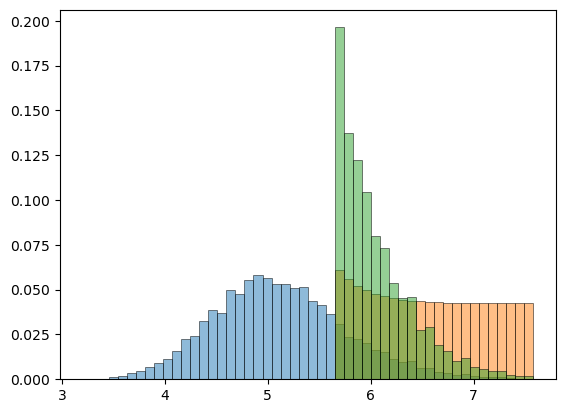

In [105]:


fig, ax = plt.subplots(1, 1)
# plt.title('Apriorní a aposteriorní prediktivní hustota')
# plt.plot(x, pmf_prior, 'o', color='royalblue', label='Apriorní prediktivní hustota')
# plt.plot(x, pmf_posterior, 'o', color='dimgray', label='Aposteriorní prediktivní hustota')
# ax.legend(loc='best')
# plt.xlabel('Čas [ms]')
# plt.ylabel('Hustota pozorování x')

print(len(hist), len(bins_centers))

plt.bar(bins_centers, hist, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)
plt.bar(bins_centers, likelihoods, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)
plt.bar(bins_centers, posterior, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)

# ax.hist(groups, bins=50, edgecolor='black', linewidth=0.7, density=True)
# ax.bar(bins_centers, likelihoods, bins=22, edgecolor='black', linewidth=0.7, density=True)
plt.show()
# ax.hist(d["time"], label=conf, bins=200)